# **Group assignment - The Olympics**

###### <b>Fanny Degerman, Delal Uca, Adrian Söderberg Skog och Patrik Hellgren<br>AIM25G<br>2025-11-26</b>

---

In [316]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

df = pd.read_csv("../Projekt_OS_Ungern/athlete_events.csv", index_col=0) # ta bort allt i path utom filnamnet.
display(df.head())
df.info()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 271116 entries, 1 to 135571
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 31.0+ MB


In [317]:
# A
print(f"A total of {df["NOC"].nunique()} countries are represented in the dataset.")

A total of 230 countries are represented in the dataset.


In [318]:
# B
print(f"The following countries are represented:\n{', '.join(sorted(df["NOC"].unique()))}")

The following countries are represented:
AFG, AHO, ALB, ALG, AND, ANG, ANT, ANZ, ARG, ARM, ARU, ASA, AUS, AUT, AZE, BAH, BAN, BAR, BDI, BEL, BEN, BER, BHU, BIH, BIZ, BLR, BOH, BOL, BOT, BRA, BRN, BRU, BUL, BUR, CAF, CAM, CAN, CAY, CGO, CHA, CHI, CHN, CIV, CMR, COD, COK, COL, COM, CPV, CRC, CRO, CRT, CUB, CYP, CZE, DEN, DJI, DMA, DOM, ECU, EGY, ERI, ESA, ESP, EST, ETH, EUN, FIJ, FIN, FRA, FRG, FSM, GAB, GAM, GBR, GBS, GDR, GEO, GEQ, GER, GHA, GRE, GRN, GUA, GUI, GUM, GUY, HAI, HKG, HON, HUN, INA, IND, IOA, IRI, IRL, IRQ, ISL, ISR, ISV, ITA, IVB, JAM, JOR, JPN, KAZ, KEN, KGZ, KIR, KOR, KOS, KSA, KUW, LAO, LAT, LBA, LBR, LCA, LES, LIB, LIE, LTU, LUX, MAD, MAL, MAR, MAS, MAW, MDA, MDV, MEX, MGL, MHL, MKD, MLI, MLT, MNE, MON, MOZ, MRI, MTN, MYA, NAM, NBO, NCA, NED, NEP, NFL, NGR, NIG, NOR, NRU, NZL, OMA, PAK, PAN, PAR, PER, PHI, PLE, PLW, PNG, POL, POR, PRK, PUR, QAT, RHO, ROT, ROU, RSA, RUS, RWA, SAA, SAM, SCG, SEN, SEY, SGP, SKN, SLE, SLO, SMR, SOL, SOM, SRB, SRI, SSD, STP, SUD, SUI, SUR,

In [319]:
# C
print(f"The following sports are represented:\n{', '.join(sorted(df["Sport"].unique()))}")

The following sports are represented:
Aeronautics, Alpine Skiing, Alpinism, Archery, Art Competitions, Athletics, Badminton, Baseball, Basketball, Basque Pelota, Beach Volleyball, Biathlon, Bobsleigh, Boxing, Canoeing, Cricket, Croquet, Cross Country Skiing, Curling, Cycling, Diving, Equestrianism, Fencing, Figure Skating, Football, Freestyle Skiing, Golf, Gymnastics, Handball, Hockey, Ice Hockey, Jeu De Paume, Judo, Lacrosse, Luge, Military Ski Patrol, Modern Pentathlon, Motorboating, Nordic Combined, Polo, Racquets, Rhythmic Gymnastics, Roque, Rowing, Rugby, Rugby Sevens, Sailing, Shooting, Short Track Speed Skating, Skeleton, Ski Jumping, Snowboarding, Softball, Speed Skating, Swimming, Synchronized Swimming, Table Tennis, Taekwondo, Tennis, Trampolining, Triathlon, Tug-Of-War, Volleyball, Water Polo, Weightlifting, Wrestling


In [320]:
# D
print(f"It's possible to win {', '.join(df["Medal"].dropna().unique())} medals.")

It's possible to win Gold, Bronze, Silver medals.


In [321]:
# E
df["Age"].describe().loc[["mean", "50%", "min", "max", "std"]]

mean    25.556898
50%     24.000000
min     10.000000
max     97.000000
std      6.393561
Name: Age, dtype: float64

In [322]:
# F
## How many different athletes are represented in the dataset?
print(f"There are {df["Name"].dropna().nunique():,}".replace(","," ") + " different athletes in the dataset.\n")

## How many different men/women are represented in the dataset?
print(f"{df.groupby("Sex")["Name"].nunique()}\n")

## Where were the Winter Olympics held in 1988?
print(f"The 1988 Winter Olympics were held in {''.join(df.loc[(df["Year"] == 1988) & (df["Season"] == "Winter"), "City"].unique())}.\n")

## What is the name of every gold medal winner in Sweden during all these 120 years?
swe_gold = df.loc[(df["Medal"] == "Gold") & (df["NOC"] == "SWE"), ["Year", "Name"]].sort_values("Year")
print('\n'.join(f"{year} {name}" for year, name in zip(swe_gold["Year"], swe_gold["Name"])) + "\n")

## In which year did Sweden win the most gold medals?
swe_unique_sports = df.loc[(df["Medal"] == "Gold") & (df["NOC"] == "SWE"), ["Year", "Event"]].drop_duplicates()
swe_count = swe_unique_sports["Year"].value_counts()
print(f"In {swe_count.idxmax()} Sweden took {swe_count.max()} gold medals.")

There are 134 732 different athletes in the dataset.

Sex
F     33808
M    100979
Name: Name, dtype: int64

The 1988 Winter Olympics were held in Calgary.

1900 August Nilsson
1900 Gustaf Fredrik Sderstrm
1900 Karl Gustaf Vilhelm Staaf (Johansson-)
1906 Hjalmar Stefanus Mellander
1906 Eric Otto Valdemar Lemming
1908 Karl Axel Patrik Norling
1908 Erik Tor Waldemar Norberg
1908 Nils Gustav von Kantzow
1908 Folke Frithiof Martens Mrtensson
1908 Karl Osvald Moberg
1908 Carl Martin Norberg
1908 Erik Norberg
1908 Gustaf Adolf Olson
1908 Harald Axel Fredrik Ljung
1908 Lars Daniel Norling
1908 Nils Johan Widforss
1908 Sven Axel Richard Landberg
1908 Olof Gustaf Reinhold "Olle" Lanner
1908 Eric Otto Valdemar Lemming
1908 Eric Otto Valdemar Lemming
1908 Ernst Oscar Rosell
1908 Sven Axel Arigo Rosn
1908 Gustaf Vilhelm Rosenquist
1908 Johan Arvid Konstantin Knppel
1908 Carl August Hjalmar Johansson
1908 Nils Gustaf Johnsson (-Weidel)
1908 Rolf Vilhelm Oscar Johnsson
1908 Curt Hugo Jahnke
1908 Joha

<Axes: xlabel='Sex', ylabel='count'>

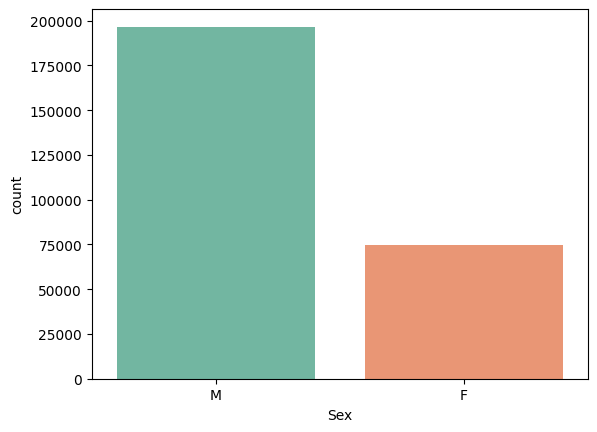

In [323]:
# G
sns.countplot(df, x="Sex", hue="Sex", palette="Set2")

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271116 entries, 1 to 135571
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 31.0+ MB


In [327]:
# H
medals = df[["NOC", "Year", "Event", "Medal"]].dropna().drop_duplicates(subset=["NOC", "Year", "Event", "Medal"])
medals_per_NOC = medals.groupby("NOC")["Medal"].count().sort_values(ascending=False)
top10_NOC = medals_per_NOC[:10].reset_index()
#display(top10_NOC)

fig = px.bar(data_frame=top10_NOC,
       x="NOC", 
       y="Medal", 
       labels={"NOC": "Countries", "Medal": "Number of medals"}, 
       title="Top 10 countries with most medals won",
       color="NOC")
fig.show()

In [326]:
# I: plotta gärna fler saker som är intressant
